# SkillCraft Technology Data Science Internship

## Task 4

#### Analyze traffic accident data to identify patterns related to road conditions, weather, and time of day. Visualize accident hotspots and contributing factors.

In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as ans

In [2]:
# Load the dataset
df = pd.read_csv("Metro_Interstate_Traffic_Volume.csv")

# Preview the data
print(df.head())
print(df.columns)

  holiday    temp  rain_1h  snow_1h  clouds_all weather_main  \
0     NaN  288.28      0.0      0.0          40       Clouds   
1     NaN  289.36      0.0      0.0          75       Clouds   
2     NaN  289.58      0.0      0.0          90       Clouds   
3     NaN  290.13      0.0      0.0          90       Clouds   
4     NaN  291.14      0.0      0.0          75       Clouds   

  weather_description            date_time  traffic_volume  
0    scattered clouds  2012-10-02 09:00:00            5545  
1       broken clouds  2012-10-02 10:00:00            4516  
2     overcast clouds  2012-10-02 11:00:00            4767  
3     overcast clouds  2012-10-02 12:00:00            5026  
4       broken clouds  2012-10-02 13:00:00            4918  
Index(['holiday', 'temp', 'rain_1h', 'snow_1h', 'clouds_all', 'weather_main',
       'weather_description', 'date_time', 'traffic_volume'],
      dtype='object')


In [5]:
# Data Cleaning & Preprocessing
# Check for missing values
print(df.isnull().sum())

holiday                48143
temp                       0
rain_1h                    0
snow_1h                    0
clouds_all                 0
weather_main               0
weather_description        0
date_time                  0
traffic_volume             0
dtype: int64


In [7]:
# Convert date_time column to datetime format
df['date_time'] = pd.to_datetime(df['date_time'])

In [9]:
# Extract useful time features
df['hour'] = df['date_time'].dt.hour
df['dayofweek'] = df['date_time'].dt.dayofweek 
df['month'] = df['date_time'].dt.month

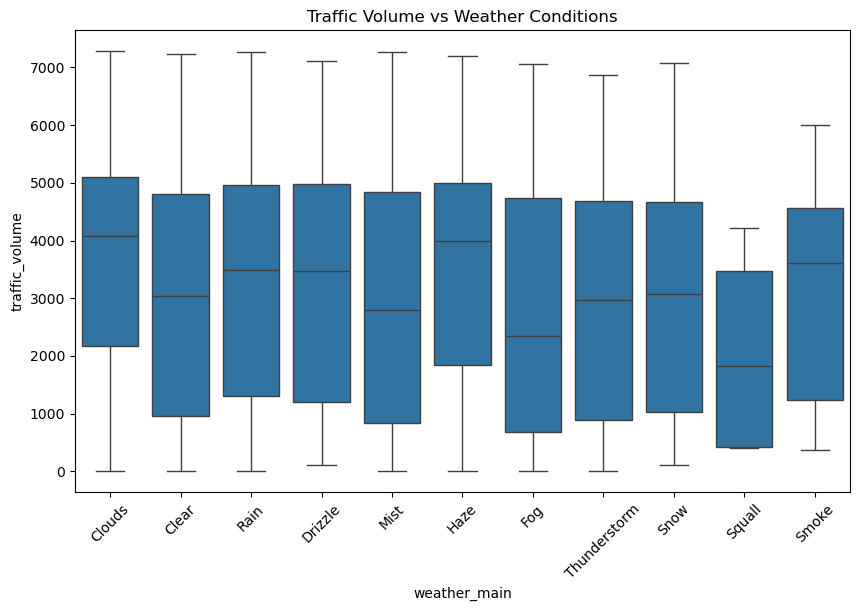

In [11]:
# Exploratory Data Analysis
import seaborn as sns

# 1. Traffic Volume vs Weather
plt.figure(figsize=(10,6))
sns.boxplot(x='weather_main', y='traffic_volume', data=df)
plt.title("Traffic Volume vs Weather Conditions")
plt.xticks(rotation=45)
plt.show()

C:\Users\shahe\AppData\Local\Temp\ipykernel_8340\3256595523.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='hour', y='traffic_volume', data=df, ci=None, marker="o")


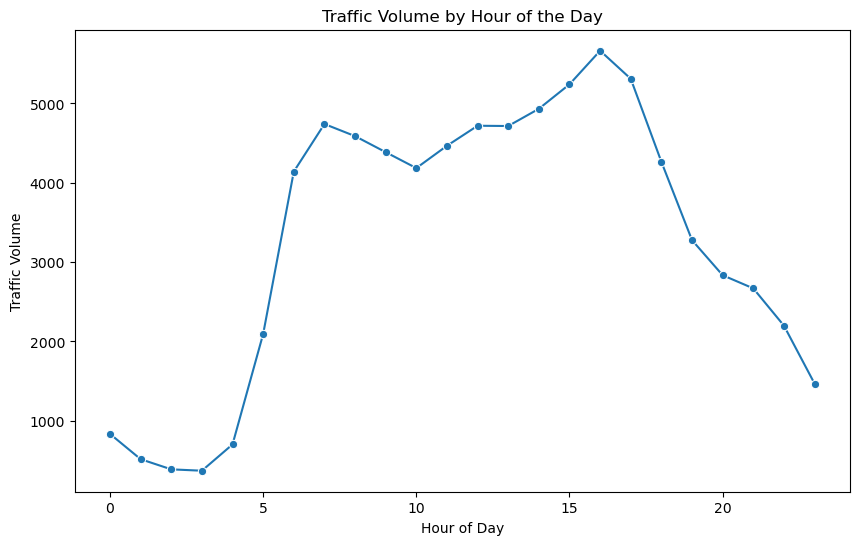

In [13]:
# 2. Traffic Volume by Time of Day (rush hours)
plt.figure(figsize=(10,6))
sns.lineplot(x='hour', y='traffic_volume', data=df, ci=None, marker="o")
plt.title("Traffic Volume by Hour of the Day")
plt.xlabel("Hour of Day")
plt.ylabel("Traffic Volume")
plt.show()

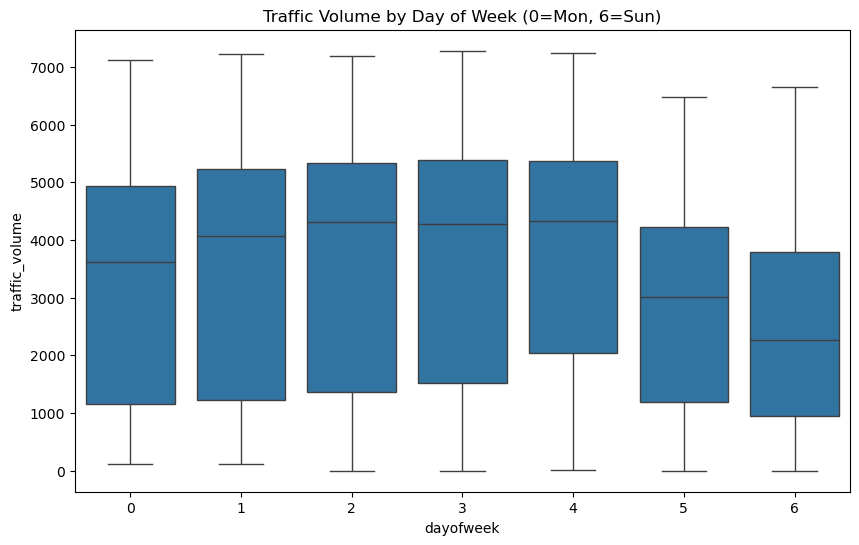

In [15]:
# 3. Traffic Volume by Day of Week
plt.figure(figsize=(10,6))
sns.boxplot(x='dayofweek', y='traffic_volume', data=df)
plt.title("Traffic Volume by Day of Week (0=Mon, 6=Sun)")
plt.show()

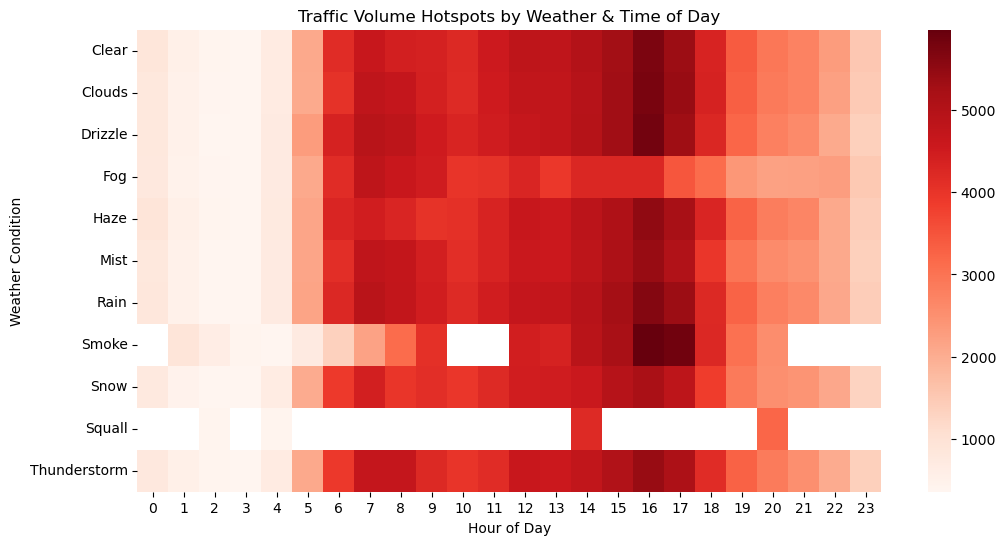

In [17]:
# Accident Hotspots (using weather & time)
hotspots = df.groupby(['weather_main', 'hour'])['traffic_volume'].mean().reset_index()

plt.figure(figsize=(12,6))
sns.heatmap(
    hotspots.pivot(index="weather_main", columns="hour", values="traffic_volume"),
    cmap="Reds",
    annot=False
)
plt.title("Traffic Volume Hotspots by Weather & Time of Day")
plt.xlabel("Hour of Day")
plt.ylabel("Weather Condition")
plt.show()